# 1 预备知识
## 1.1 数据操作

In [8]:
import torch

In [9]:
x=torch.arange(4)

## 张量的形状，向量，一维数组
print(x.shape)

# 张量中元素的总数，标量
print(x.numel())

# 改变张量的形状，不改变数量和元素值
print(x.reshape(2,2))

# 使用全0或者全1、其他常量或者从特定分布中随机采样的数字

print(torch.zeros(2,2,2))

# 通过提供包含数值的python列表（或者嵌套列表）来为所需张量中的每个元素赋予确定值
print(torch.tensor([[2,1,4],[1,2,3]]))

# 常见的标准算术运算符都可以被升级为按元素运算
y=torch.tensor([1,5,8,3])
print(x+y,x-y,x*y,x/y,x**y)



torch.Size([4])
4
tensor([[0, 1],
        [2, 3]])
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])
tensor([[2, 1, 4],
        [1, 2, 3]])
tensor([ 1,  6, 10,  6]) tensor([-1, -4, -6,  0]) tensor([ 0,  5, 16,  9]) tensor([0.0000, 0.2000, 0.2500, 1.0000]) tensor([  0,   1, 256,  27])


### 广播机制

In [10]:
# 把多个张量连结在一起
a=torch.arange(6,dtype=torch.float32).reshape((2,3))
b=torch.tensor([[2.0,1,4],[5,8,2]])
c=torch.concat((a,b),dim=0)#行堆积
d=torch.concat((a,b),dim=1)#列堆积
print(c)
print(d)

# 用逻辑运算符构建二元张量
print(a==b)

#即使形状不同，仍然可以用广播机制来执行元素操作
## 程序会将张量自动复制成形状相同的张量进行元素相加
a=torch.arange(3).reshape((3,1))
b=torch.arange(2).reshape((1,2))
print(a,b,a+b)

# 访问元素
print(a[-1])
print(a[1:3])

# 写值
a[0:1]=10
print(a)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [2., 1., 4.],
        [5., 8., 2.]])
tensor([[0., 1., 2., 2., 1., 4.],
        [3., 4., 5., 5., 8., 2.]])
tensor([[False,  True, False],
        [False, False, False]])
tensor([[0],
        [1],
        [2]]) tensor([[0, 1]]) tensor([[0, 1],
        [1, 2],
        [2, 3]])
tensor([2])
tensor([[1],
        [2]])
tensor([[10],
        [ 1],
        [ 2]])


In [11]:
# 运行一些操作可能会导致为新结果分配内存
before=id(y)
print(before)
y=y+x
print(id(y)==before)

# 执行原地操作,创造一个z，内存没发生变化
z=torch.zeros_like(y)
print(id(z))
z[:]=x+y
print(id(z))

# 若后续计算没有重复使用x,也可以x[:]=x+y或x+=y来减少内存开销
before=id(x)
print(before)
x+=y
print(id(x)==before)

3112312010928
False
3112312012688
3112312012688
3112219480128
True


In [12]:
# 转为numpy张量
m=x.numpy()
n=torch.tensor(m)
print(type(m),type(n))

# 把大小为1的张量转为numpy标量
a=torch.tensor([3.5])
print(a,a.item(),float(a),int(a))


<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([3.5000]) 3.5 3.5 3


In [13]:
## 练习
## 1 将本节中的条件语句X == Y更改为X < Y或X > Y
print(x,y)
print(x>y)

## 2 用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量
p=torch.arange(12).reshape((1,3,4))
q=torch.tensor([[[1,2,3,4],[1,2,3,4],[1,2,3,4]],[[2,4,6,8],[2,4,6,8],[2,4,6,8]]])
print(p,q)
print(p+q)

tensor([ 1,  7, 12,  9]) tensor([ 1,  6, 10,  6])
tensor([False,  True,  True,  True])
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]]) tensor([[[1, 2, 3, 4],
         [1, 2, 3, 4],
         [1, 2, 3, 4]],

        [[2, 4, 6, 8],
         [2, 4, 6, 8],
         [2, 4, 6, 8]]])
tensor([[[ 1,  3,  5,  7],
         [ 5,  7,  9, 11],
         [ 9, 11, 13, 15]],

        [[ 2,  5,  8, 11],
         [ 6,  9, 12, 15],
         [10, 13, 16, 19]]])


## 1.2 数据预处理

In [14]:
import os
import pandas as pd

#创建数据集读取数据集
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

data=pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [15]:
# 处理缺失值
## 这里举例插值
inputs,outputs=data.iloc[:,0:2],data.iloc[:,2]
inputs=inputs.fillna(inputs.mean())
print(inputs)

## 对于inputs中的类别值或离散值，将NaN视为一个类别
inputs=pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [16]:
# 转换为张量格式
## 现在inputs和outputs中的所有条目都是数值类型
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
print(X,y)

tensor([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=torch.float64) tensor([127500, 106000, 178100, 140000])


In [17]:
# 练习
## 删除缺失值最多的列
print(data)
sum = data.isna().sum()
d = data.drop(columns=sum.index[sum.argmax()])
print(d)

## 将预处理后的数据集转换为张量格式。
inp,outp=d.iloc[:,0],d.iloc[:,1]
inp=pd.get_dummies(inp,dummy_na=True)
print(inp)
print(outp)
v,w = torch.tensor(inp.values), torch.tensor(outp.values,dtype=torch.float32)
print(v,w)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000
   NumRooms   Price
0       NaN  127500
1       2.0  106000
2       4.0  178100
3       NaN  140000
   2.0  4.0  NaN
0    0    0    1
1    1    0    0
2    0    1    0
3    0    0    1
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64
tensor([[0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]], dtype=torch.uint8) tensor([127500., 106000., 178100., 140000.])


# 2 线性代数

In [18]:
import torch

## 2.1 标量

In [19]:
# 标量由只有一个元素的张量表示
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

## 2.2 向量

In [20]:
# 向量可以被视为标量值组成的列表。 这些标量值被称为向量的元素（element）或分量（component）。
# 一维张量表示向量。一般来说，张量可以具有任意长度，取决于机器的内存限制。
x = torch.arange(4)
print(x)
# 访问元素
x[3]
# 长度
len(x)
# 形状
x.shape


tensor([0, 1, 2, 3])


torch.Size([4])

## 2.3 矩阵

In [21]:
# 当调用函数来实例化张量时， 我们可以通过指定两个分量m和n来创建一个形状为m*n的矩阵。

A = torch.arange(20).reshape(5, 4)
A
# 转置
A.T


tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [22]:
# 方阵的对称矩阵
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
print(B)
B==B.T


tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

## 2.4 张量

In [23]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [24]:
# 张量算法的基本性质

## 加减乘除基本运算
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [25]:
## 两个矩阵的按元素乘法称为Hadamard积
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [26]:
## 张量乘以或加上一个标量
### 不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## 2.5 降维

In [27]:
## 元素求和
x = torch.arange(4, dtype=torch.float32)
x, x.shape, x.sum()
A,A.shape, A.sum(),A[1][2]


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor(190.),
 tensor(6.))

In [28]:
## 默认情况下，求和会沿所有轴降低张量维度
## 可以指定张量沿哪个轴降低维度
A_sum_axis0 = A.sum(axis=0)# 沿行降低维度,行消失
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [29]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [30]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

In [31]:
## 平均值
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [32]:
## 沿指定轴计算平均值
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [33]:
## 非降维求和
###但是，有时在调用函数来计算总和或均值时保持轴数不变会很有用。
sum_A = A.sum(axis=1, keepdims=True)
sum_A
A/sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [34]:
## 累积元素求和
A,A.cumsum(axis=0)


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]))

## 2.6 点积

In [35]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [36]:
# 元素乘法+求和
torch.sum(x * y)

tensor(6.)

## 2.7 矩阵-向量积

In [37]:
A,x,A.shape, x.shape, torch.mv(A, x)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]),
 torch.Size([5, 4]),
 torch.Size([4]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

## 2.8 矩阵-矩阵乘法

In [38]:
B = torch.ones(4, 3)

A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

## 2.9 范数
向量的范数是表示一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。
L2范数和 L1范数是更一般Lp范数的特例：
 $||x||_p=(\sum|x_i|^p)^{1/p}$
矩阵的范数
 $||X||_p=(\sum\sum|x_{ij}^2)^{1/2}$

#### 范数和目标
在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

In [39]:
## L2范数是向量元素平方和的平方根
u = torch.tensor([3.0, -4.0])
torch.norm(u)


tensor(5.)

In [40]:
## L1范数是向量元素的绝对值之和
## 与L2范数相比，L1范数受异常值的影响较小。为了计算L1范数，我们将绝对值函数和按元素求和组合起来。
torch.abs(u).sum()

tensor(7.)

In [41]:
## Frobenius范数满足向量范数的所有性质
A=torch.ones((4, 9))
A,torch.norm(A)

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor(6.))

## 2.10 练习

In [42]:
# 1.一个矩阵的转置的转置是它自己
A,A.T,A.T.T

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]))

In [43]:
# 2.两个矩阵，证明“它们转置的和”等于“它们和的转置”
A = torch.arange(12).reshape(3,4)
B = torch.ones(3,4)
(A+B).T,A.T+B.T

(tensor([[ 1.,  5.,  9.],
         [ 2.,  6., 10.],
         [ 3.,  7., 11.],
         [ 4.,  8., 12.]]),
 tensor([[ 1.,  5.,  9.],
         [ 2.,  6., 10.],
         [ 3.,  7., 11.],
         [ 4.,  8., 12.]]))

In [44]:
# 3.任意方阵，A+A.T总是对称的吗?为什么?
## 是
A = torch.arange(16).reshape(4,4)
A+A.T

tensor([[ 0,  5, 10, 15],
        [ 5, 10, 15, 20],
        [10, 15, 20, 25],
        [15, 20, 25, 30]])

In [45]:
# 4.形状（2，3，4）的张量X。len(X)的输出结果是什么？
A = torch.arange(24).reshape(2,3,4)
A,len(A)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 2)

In [46]:
# 5.任意形状的张量X,len(X)是否总是对应于X特定轴的长度?这个轴是什么
# 是对应于特定轴的长度，应该是axis=2
A = torch.arange(48).reshape(4,3,4)
A,len(A)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]],
 
         [[24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35]],
 
         [[36, 37, 38, 39],
          [40, 41, 42, 43],
          [44, 45, 46, 47]]]),
 4)

In [47]:
# 6.运行A/A.sum(axis=1)
A = torch.arange(12).reshape(3,4)
print(A.shape,A.sum(axis=1).shape)#列消失
print(A/A.sum(axis=0))
B = torch.arange(16).reshape(4,4)
B.shape,B.sum(axis=1).shape,B/B.sum(axis=1)

torch.Size([3, 4]) torch.Size([3])
tensor([[0.0000, 0.0667, 0.1111, 0.1429],
        [0.3333, 0.3333, 0.3333, 0.3333],
        [0.6667, 0.6000, 0.5556, 0.5238]])


(torch.Size([4, 4]),
 torch.Size([4]),
 tensor([[0.0000, 0.0455, 0.0526, 0.0556],
         [0.6667, 0.2273, 0.1579, 0.1296],
         [1.3333, 0.4091, 0.2632, 0.2037],
         [2.0000, 0.5909, 0.3684, 0.2778]]))

In [48]:
# 7.考虑一个具有形状(2,3,4)的张量，在轴0、1、2上的求和输出是什么形状?
A = torch.arange(24).reshape(2,3,4)
A,A.sum(axis=0).shape,A.sum(axis=1).shape,A.sum(axis=2).shape
#面消失，列消失，行消失

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 torch.Size([3, 4]),
 torch.Size([2, 4]),
 torch.Size([2, 3]))

In [49]:
# 8.为linalg.norm函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到什么?
A = torch.randn(2,3,4)
B = torch.ones(2,3,4)
A,torch.linalg.norm(A),torch.norm(A)

(tensor([[[ 0.2605,  0.3793, -0.2679,  0.3022],
          [-1.6352,  1.0393,  0.3542, -0.3184],
          [ 1.8391, -0.0698,  0.7222,  0.3123]],
 
         [[ 0.7010, -0.0454,  1.2480,  1.7198],
          [-0.6909,  0.3297, -0.7733,  1.1702],
          [-0.3396, -0.3399, -0.0069, -1.0231]]]),
 tensor(4.1475),
 tensor(4.1475))

# 3 微积分
## 3.1 导数和微分
微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题
导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率

In [50]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

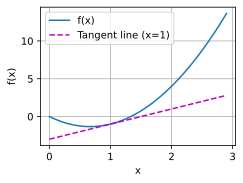

In [51]:
## 导数解释可视化 注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中
def f(x):
    return 3 * x ** 2 - 4 * x
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 3.2 偏导
多个变量
## 3.3 梯度
连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量
## 3.4 链式法则
可以用来微分复合函数
## 3.5 练习

C:\Users\rosie\AppData\Local\Temp\ipykernel_6496\2106227047.py:3: RuntimeWarning: divide by zero encountered in true_divide
  fx=x**3-1/x


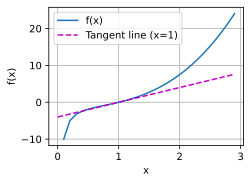

In [52]:
# 1. 绘制下x^3-1/x在x=1处切线的图像
x = np.arange(0, 3, 0.1)
fx=x**3-1/x
plot(x,[fx,4*x-4],'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [53]:
# 2. 求3x1**2+5*exp(x2)的梯度
# [6x1,5exp(x2)]

2 求3x1**2+5*exp(x2)的梯度

[6x1,5exp(x2)]

3.||x||_2的梯度是什么

$\frac{X}{||x||_2}$


4.尝试写出函数u=f(x,y,z)，其中x=x(a,b)，y=y(a,b)，z=z(a,b)的链式法则。

$\frac{du}{da}=\frac{du}{dx}\frac{dx}{da}+\frac{du}{dy}\frac{dy}{da}+\frac{du}{dz}\frac{dz}{da}$

$\frac{du}{db}=\frac{du}{dx}\frac{dx}{db}+\frac{du}{dy}\frac{dy}{b}+\frac{du}{dz}\frac{dz}{db}$

# 4 自动微分
实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

## 4.1 对y=2X.T*X求导

In [73]:
x = torch.arange(4.0)
# 需要一个地方存储梯度
x.requires_grad_(True) 
print(x.grad)

#计算Y
y=2*torch.dot(x,x)
y

# 通过调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward(),x.grad,x.grad == 4 * x

#计算x的另一个函数
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y,y.backward(),x.grad

None


(tensor(6., grad_fn=<SumBackward0>), None, tensor([1., 1., 1., 1.]))

## 4.2 非标量变量的反向传播
当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

In [75]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y,y.sum().backward(),x.grad

(tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 None,
 tensor([0., 2., 4., 6.]))

## 4.3 分离计算
有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [77]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward(),y,u,z,x.grad == u


(None,
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([0., 1., 4., 9.]),
 tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>),
 tensor([True, True, True, True]))

In [78]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## 4.4 Python控制流的梯度计算


In [80]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
# 计算梯度
a = torch.randn(size=(), requires_grad=True)
d = f(a)
a,d.backward(),a.grad == d / a

(tensor(0.2446, requires_grad=True), None, tensor(True))

In [121]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
# 计算梯度
a = torch.randn(size=(), requires_grad=True)
d = f(a)
a,d,d.backward(),a.grad

(tensor(0.0958, requires_grad=True),
 tensor(1569.4906, grad_fn=<MulBackward0>),
 None,
 tensor(16384.))

## 4.5 小结
深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

## 4.6 练习


In [98]:
# 2. 运行反向传播函数后，立即再次运行，会发生什么

x = torch.arange(4.0)
x.requires_grad_(True) 
#计算Y
y=x*x
# 通过调用反向传播函数来自动计算y关于x每个分量的梯度
y.sum().backward(),x.grad

# 会报错
#y.sum().backward(),x.grad


(None, tensor([0., 2., 4., 6.]))

In [104]:
# 3.在控制流的例子中，我们计算d关于a的导数，如果将变量a更改为随机向量或矩阵，会发生什么？
a = torch.randn(size=(3,1), requires_grad=True)
d = f(a)

# 会报错：grad can be implicitly created only for scalar outputs
#a,d.backward(),a.grad == d / a

a,d.sum().backward(),a.grad


(tensor([[-0.1465],
         [-1.4069],
         [ 0.6053]], requires_grad=True),
 None,
 tensor([[ 5.0644],
         [10.9379],
         [ 6.0990]]))

In [125]:
# 4. 重新设计一个求控制流梯度的例子，运行并分析结果。
def f(a):
    c=2*a
    return c

m = torch.randn(size=(3,1), requires_grad=True)
n = f(m)
n.sum().backward(),m.grad

(None,
 tensor([[2.],
         [2.],
         [2.]]))

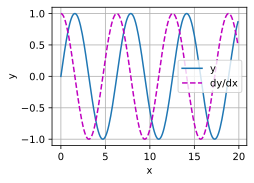

In [133]:
# 5.使f(x)=sin(x)，绘制f(x)和df(x)/dx的图像。
x = torch.arange(0, 20, 0.1)
x.requires_grad_(True)
y=torch.sin(x)

y.sum().backward(),x.grad
d2l.plot(x.detach(),[y.detach(),x.grad],'x','y',legend=['y','dy/dx'])

# 5 概率
## 5.1 基本概率论

In [134]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [139]:
# 掷骰子 传入一个概率向量，输出一个相同长度的向量，采样次数
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()
multinomial.Multinomial(10, fair_probs).sample()

counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1672, 0.1681, 0.1671, 0.1660, 0.1666, 0.1650])

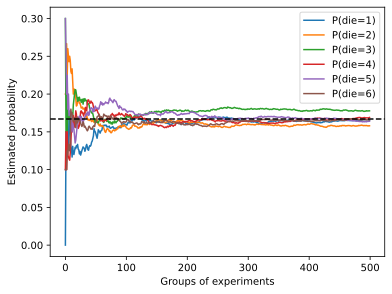

In [140]:
# 概率随着时间推移收敛到真实概率
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

## 5.2 多个随机变量
条件概率
联合概率
贝叶斯定理
边际化
独立性
期望和方差

我们可以从概率分布中采样。
我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。
期望和方差为概率分布的关键特征的概括提供了实用的度量形式。

## 5.3 练习

2.给定两个概率为P(A)和P(B)的事件，计算P(AUB)和P(A∩B)的上限和下限。（提示：使用友元图来展示这些情况。

P(AUB) 最小值是max(P(A),P(B)),最大值是1

P(A∩B) 最小值是0,最大值是min(P(A),P(B))

3.假设我们有一系列随机变量，例如A、B和C，其B只依赖于A，而C只依赖于B，能简化联合概率P(A,B,C)吗？（提示：这是一个马尔可夫链。)

P(A,B,C) = P(A)P(B|A)P(C|B)

4.第一个测试更准确，为什么不运行第一个测试两次，而是同时运行第一个和第二个测试

很多解释说 运行第一个测试两次，不是独立的，贝叶斯定理不能适用

In [141]:
# 1.进行m=500组实验，每组抽取n=10个样本。改变m和n，观察和分析实验结果。
multinomial.Multinomial(10, fair_probs).sample((500,))
counts / 1000 

tensor([[0.0000, 0.0020, 0.0030, 0.0010, 0.0030, 0.0010],
        [0.0030, 0.0020, 0.0000, 0.0020, 0.0020, 0.0010],
        [0.0010, 0.0040, 0.0030, 0.0000, 0.0010, 0.0010],
        ...,
        [0.0020, 0.0010, 0.0020, 0.0020, 0.0020, 0.0010],
        [0.0000, 0.0030, 0.0020, 0.0030, 0.0020, 0.0000],
        [0.0000, 0.0010, 0.0020, 0.0030, 0.0020, 0.0020]])

# 6 查阅文档

In [143]:
# 为了知道模块中可以调用哪些函数和类，可以调用dir函数。 例如，我们可以查询随机数生成模块中的所有属性：
import torch

print(dir(torch.distributions))

# 查找特定函数和类的用法，help函数
help(torch.ones)


['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',